# Environment Demo

In [1]:
import sys
import os
import importlib
import numpy as np
import time

# Add the parent directory to the Python path
sys.path.append(os.path.abspath('../'))
import environment 
importlib.reload(environment)
import utils
importlib.reload(utils)

<module 'utils' from '/Users/lorenzoleuzzi/Documents/GitHub/lifelong_evolutionary_swarms/utils.py'>

## Robot features

- 25 cm diameter
- compass
- 360 vision sensor and object reconition in range 100cm
- comunication between others robots
- ability to pick up stuff (in they're in the same position of the object)
- holonomic motion (every directions)
- maximum velocity: 200 cm/s
- maximum acceleration: 400 cm/s²
- maximum distance covered in a single move: 1/2 acceleration * tstep, 8cm with tstep = 200 ms 

Simulation measurements: everything is divide by the agent size which is reperesented as point in the arena

In [2]:
f"{environment.SIMULATION_ROBOT_SIZE}, {environment.SIMULATION_SENSOR_RANGE}, {environment.TIME_STEP}, {environment.SIMULATION_MAX_WHEEL_VELOCITY}"

'1.0, 4.0, 0.1, 2.0'

We are in a continuous 2D environment (no physics), a robot possesses the capability to navigate in any direction, covering any distance up to a defined maximum per step. Additionally, the robot can pick up and deposit an object objects when is underneath or when it reached an edge, resepctively.

The robots are equipped with sensory equipment capable of identifying nearby entities. A "neighbor" is characterized by a tuple comprising the type of object, the distance to it, and its relative direction. Accordingly, each robot maintains a list of such tuples for a predefined fixed number of neighboring entities.

## Arena

5m x 5m with robots and colored objects 

In [3]:
environment.SIMULATION_ARENA_SIZE 

20.0

## Objective
A target color. The robots must pick up the objects of that color and deposit them in right position. The deposit area is in an edge of the arena (top edge).

In [4]:
environment.RED

3

In [5]:
environment.REWARD_PICK, environment.REWARD_DROP

(1, 2)

## Environment initialization

In [13]:
env = environment.SwarmForagingEnv(target_color= environment.BLUE, n_agents = 3, n_blocks = 30, distribution="uniform")
initial_state, _ = env.reset(seed = 1) 
env.render()
initial_state

. 0 . . . . . . . . . . . 2 . . . . . .
. . . . . . . . . . . . . 1 . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . O . . . O . . . . . . . O . .
. O . . . . . . . . . . . O . . . . . .
. . . . . O . . . . . . O . . . O . . .
. . . . . . . . . . O . . . . . O . . .
. . . . . . . . . . . . O . . . . . . .
. . . . . . . . . . . . O . . . O . . .
. . . . O . . . . . . . . . O . . . . .
. . O . O . . . . . O . . . O . . . . .
. . . . . . . . . . . . . . O . . . . .
. . . . . . O . . . O . O . . . O . . .
. . . . . . . . . O . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . O . O . O . . . O . O . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .


[{'neighbors': array([[ 1.,  0.,  0.],
         [ 1.,  1., 90.],
         [ 0.,  0.,  0.]]),
  'heading': 180.0,
  'carrying': -1},
 {'neighbors': array([[1., 1., 0.],
         [2., 1., 0.],
         [0., 0., 0.]]),
  'heading': 180.0,
  'carrying': -1},
 {'neighbors': array([[  1.,   0.,   0.],
         [  2.,   1., 180.],
         [  0.,   0.,   0.]]),
  'heading': 180.0,
  'carrying': -1}]

In [4]:
env.process_observation(initial_state)

array([[ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.5000000e-01,  0.0000000e+00,  0.0000000e+00,
         1.0000000e+00,  0.0000000e+00,  1.0000000e+00,  6.1232340e-17,
         1.0000000e+00,  1.2246468e-16, -1.0000000e+00,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,

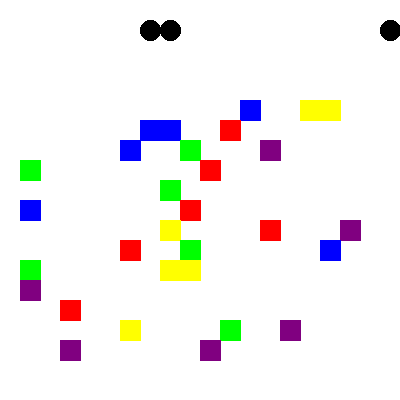

In [79]:
env.render(False)

In [15]:
env.action_space.sample()

(array([ 1.48870411, -0.74078643, -1.34366745]),
 array([-0.40716756,  0.09974027, -1.82387127]),
 array([ 1.24791367,  1.69690379, -0.16896223]))

## Testing

In [154]:
cumulative_reward = 0

In [474]:
action = env.action_space.sample()
action = (environment.MOVE_UP * np.array([5]), environment.MOVE_UP * np.array([5]), environment.MOVE_UP* np.array([5]))
next_state, reward, done, _, _ = env.step(action)
env.render()
cumulative_reward += reward
reward, cumulative_reward, env._agents_carrying[2], env.target_color

. . 0 . . 1 . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . 2 . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . O . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . O . .
. . . . . . . . . . . . . O . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . .


(2.0, 36.0, -1, 3)

## Random solver

In [16]:
steps = 0
total_reward = 0
while True:
    action = env.action_space.sample()
    next_state, reward, done, _, info = env.step(action)
    steps += 1
    total_reward += reward
    if done:
        break

f"Done in {steps} steps with reward {total_reward}, info: {info}"

KeyboardInterrupt: 

## Profiling

about 2000 steps per second

In [48]:
def profile():
    total_time = 0
    for i in range(2000):
        action = env.action_space.sample()
        start = time.time()
        next_state, reward, done, _, _ = env.step(action)
        end = time.time()
        total_time += end - start
    return total_time
profile()

1.5148377418518066

In [19]:
import cProfile
cProfile.run('profile()', sort='cumtime')

         608506 function calls (598506 primitive calls) in 1.596 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.596    1.596 {built-in method builtins.exec}
        1    0.000    0.000    1.596    1.596 <string>:1(<module>)
        1    0.017    0.017    1.596    1.596 1416959497.py:1(profile)
     2000    0.190    0.000    1.081    0.001 environment.py:323(step)
61631/51631    0.106    0.000    0.541    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
     2000    0.008    0.000    0.493    0.000 tuple.py:87(sample)
     8000    0.012    0.000    0.485    0.000 tuple.py:112(<genexpr>)
     6000    0.149    0.000    0.473    0.000 box.py:184(sample)
     2000    0.224    0.000    0.282    0.000 environment.py:238(_detect)
     6000    0.107    0.000    0.255    0.000 {method 'uniform' of 'numpy.random._generator.Generator' objects}
    10000    0.025    0.000 